### 1. Data Loading

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [48]:
data = pd.read_csv('data/arXiv_scientific dataset.csv')

### 2. Data exploration

In [49]:
data.head()

,id,title,category,category_code,published_date,updated_date,authors,first_author,summary,summary_word_count
0,cs-9308101v1,Dynamic Backtracking,Artificial Intelligence,cs.AI,8/1/93,8/1/93,['M. L. Ginsberg'],'M. L. Ginsberg',Because of their occasional need to return to ...,79
1,cs-9308102v1,A Market-Oriented Programming Environment and ...,Artificial Intelligence,cs.AI,8/1/93,8/1/93,['M. P. Wellman'],'M. P. Wellman',Market price systems constitute a well-underst...,119
2,cs-9309101v1,An Empirical Analysis of Search in GSAT,Artificial Intelligence,cs.AI,9/1/93,9/1/93,"['I. P. Gent', 'T. Walsh']",'I. P. Gent',We describe an extensive study of search in GS...,167
3,cs-9311101v1,The Difficulties of Learning Logic Programs wi...,Artificial Intelligence,cs.AI,11/1/93,11/1/93,"['F. Bergadano', 'D. Gunetti', 'U. Trinchero']",'F. Bergadano',As real logic programmers normally use cut (!)...,174
4,cs-9311102v1,Software Agents: Completing Patterns and Const...,Artificial Intelligence,cs.AI,11/1/93,11/1/93,"['J. C. Schlimmer', 'L. A. Hermens']",'J. C. Schlimmer',To support the goal of allowing users to recor...,187


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136238 entries, 0 to 136237
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   id                  136238 non-null  object
 1   title               136238 non-null  object
 2   category            136238 non-null  object
 3   category_code       136238 non-null  object
 4   published_date      136238 non-null  object
 5   updated_date        136238 non-null  object
 6   authors             136238 non-null  object
 7   first_author        136238 non-null  object
 8   summary             136238 non-null  object
 9   summary_word_count  136238 non-null  int64 
dtypes: int64(1), object(9)
memory usage: 10.4+ MB


In [51]:
print(f"Dataset shape: {data.shape}")
print("\nSample data:")
print(data.head(3))

Dataset shape: (136238, 10)

Sample data:
             id                                              title  \
0  cs-9308101v1                               Dynamic Backtracking   
1  cs-9308102v1  A Market-Oriented Programming Environment and ...   
2  cs-9309101v1            An Empirical Analysis of Search in GSAT   

                  category category_code published_date updated_date  \
0  Artificial Intelligence         cs.AI         8/1/93       8/1/93   
1  Artificial Intelligence         cs.AI         8/1/93       8/1/93   
2  Artificial Intelligence         cs.AI         9/1/93       9/1/93   

                      authors      first_author  \
0          ['M. L. Ginsberg']  'M. L. Ginsberg'   
1           ['M. P. Wellman']   'M. P. Wellman'   
2  ['I. P. Gent', 'T. Walsh']      'I. P. Gent'   

                                             summary  summary_word_count  
0  Because of their occasional need to return to ...                  79  
1  Market price systems constitut

In [54]:
category_counts = data['category'].value_counts()
top_10_categories = category_counts.head(10)

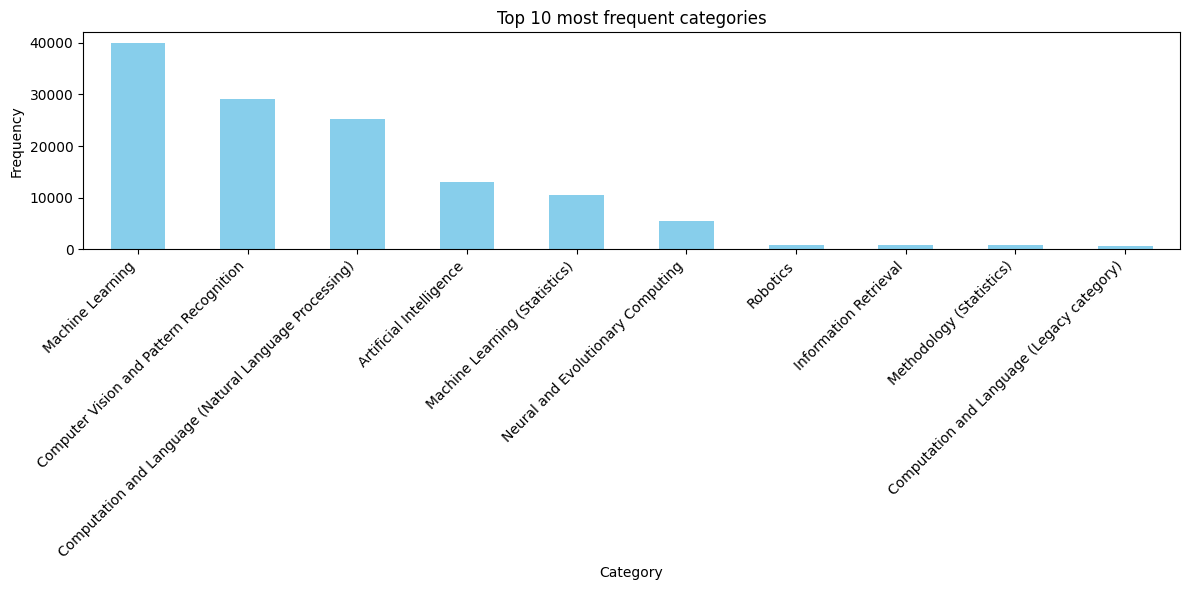

In [55]:
plt.figure(figsize=(12, 6))
top_10_categories.plot(kind='bar', color='skyblue')
plt.title('Top 10 most frequent categories')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [56]:
print(f"\nTop 10 categories and their Frequencies: {top_10_categories}")


Top 10 categories and their Frequencies: category
Machine Learning                                          39986
Computer Vision and Pattern Recognition                   29057
Computation and Language (Natural Language Processing)    25202
Artificial Intelligence                                   12969
Machine Learning (Statistics)                             10447
Neural and Evolutionary Computing                          5509
Robotics                                                    903
Information Retrieval                                       901
Methodology (Statistics)                                    882
Computation and Language (Legacy category)                  750
Name: count, dtype: int64


In [57]:
data['abstract_length'] = data['summary'].astype(str).apply(lambda x: len(x.split()))
data['title_length'] = data['title'].astype(str).apply(lambda x: len(x.split()))

In [58]:
print(f"\nAverage Abstract Length: {data['abstract_length'].mean()}")
print(f"Average Title Length: {data['title_length'].mean()}")


Average Abstract Length: 162.38609639014078
Average Title Length: 9.06683157415699


In [ ]:
numerical_features = ['summary_word_count', 'abstract_length', 'title_length']
print(f"Descriptive Statistics for Numerical Features: {data[numerical_features].describe()}")

Descriptive Statistics for Numerical Features:        summary_word_count  abstract_length   title_length
count       136238.000000    136238.000000  136238.000000
mean           162.386830       162.386096       9.066832
std             49.374474        49.376129       3.168396
min              1.000000         1.000000       1.000000
25%            128.000000       128.000000       7.000000
50%            160.000000       160.000000       9.000000
75%            195.000000       195.000000      11.000000
max            552.000000       552.000000      36.000000


In [61]:
Q1 = data['summary_word_count'].quantile(0.25)
Q3 = data['summary_word_count'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = data[(data['summary_word_count'] < lower_bound) | (data['summary_word_count'] > upper_bound)]


In [62]:
print(f"\nNumber of outliers in 'summary_word_count': {len(outliers)}")
print(f"Example outliers: \n{outliers[['summary_word_count']].head()}")


Number of outliers in 'summary_word_count': 465
Example outliers: 
     summary_word_count
89                  298
114                  10
155                  18
158                  17
226                  10


In [63]:
duplicate_rows = data[data.duplicated()]
num_duplicates = len(duplicate_rows)

In [64]:
print(f"\nNumber of duplicate rows: {num_duplicates}")
print(f"Analysis completed at: {datetime.now()}")


Number of duplicate rows: 0
Analysis completed at: 2025-04-22 14:03:39.638052


### 3. Features engineering

In [65]:
import re
import ast

In [66]:
# Extract the number of authors by parsing the 'aythors' column to List
data['authors'] = data['authors'].apply(lambda x: ast.literal_eval(x))
data['authors_count'] = data['authors'].apply(lambda x: len(x))

# Extract dates features
data["published_date"] = pd.to_datetime(data["published_date"])
data["updated_date"] = pd.to_datetime(data["updated_date"])
data["published_date_year"] = data["published_date"].dt.year
data["published_date_month"] = data["published_date"].dt.month
data["revision_time"] = data["updated_date"] - data["published_date"]
data["revision_time_days"] = data["revision_time"].apply(lambda x: x.days)

/var/folders/w9/d3h7vx393175sc9kvpd02znh0000gn/T/ipykernel_44443/1219172929.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data["published_date"] = pd.to_datetime(data["published_date"])
/var/folders/w9/d3h7vx393175sc9kvpd02znh0000gn/T/ipykernel_44443/1219172929.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data["updated_date"] = pd.to_datetime(data["updated_date"])


In [67]:
data[["published_date", "updated_date", "revision_time", "revision_time_days", "authors", "authors_count"]].head()

,published_date,updated_date,revision_time,revision_time_days,authors,authors_count
0,1993-08-01,1993-08-01,0 days,0,[M. L. Ginsberg],1
1,1993-08-01,1993-08-01,0 days,0,[M. P. Wellman],1
2,1993-09-01,1993-09-01,0 days,0,"[I. P. Gent, T. Walsh]",2
3,1993-11-01,1993-11-01,0 days,0,"[F. Bergadano, D. Gunetti, U. Trinchero]",3
4,1993-11-01,1993-11-01,0 days,0,"[J. C. Schlimmer, L. A. Hermens]",2


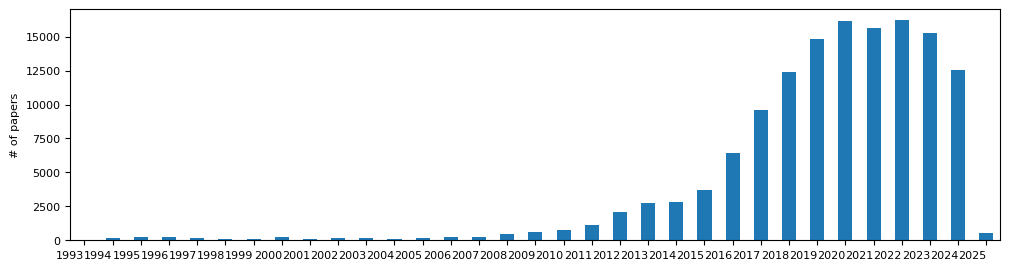

In [68]:
data.groupby("published_date_year").size().plot(kind="bar", figsize=(12, 3))
plt.xlabel("")
plt.xticks(rotation=0, ha='right', fontsize=8)
plt.yticks(fontsize=8)
plt.ylabel("# of papers", fontsize=8)
plt.show()

In [47]:
print(f'total number of unique categories: {len(data["category"].unique())}')

total number of unique categories: 138


In [69]:
top_categories = pd.DataFrame(data["category"].value_counts().sort_values(ascending=False)[0:9]).reset_index()["category"].values
data["category2"] = data["category"].apply(lambda x: x if x in top_categories else "other")

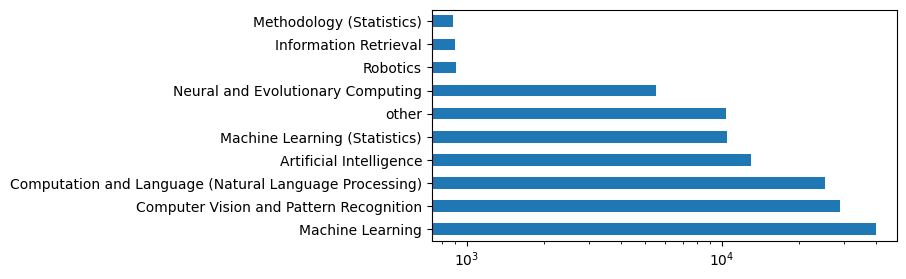

In [71]:
data["category2"].value_counts().plot(kind="barh", figsize=(6,3), logx=True)
plt.ylabel("")
plt.show()

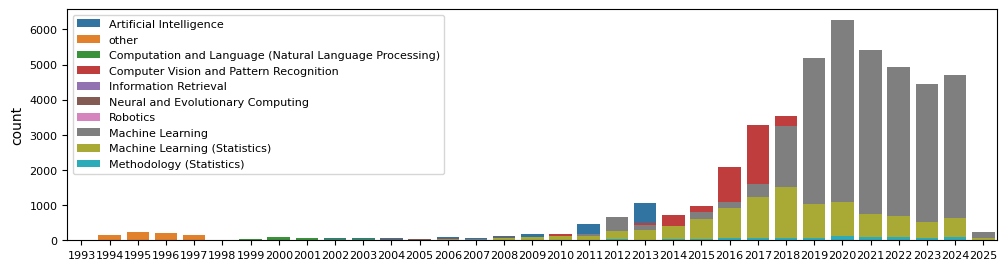

In [72]:
tmp = data.groupby(['published_date_year', 'category2']).size().reset_index()
tmp.columns = ['published_year', 'category', 'count']
plt.figure(figsize=(12,3))
sns.barplot(x='published_year', y='count', hue='category', data=tmp, dodge=False)
plt.legend(prop={'size': 8}, loc='upper left')
plt.xlabel('')
plt.tick_params(axis='both', labelsize=8)
plt.show()

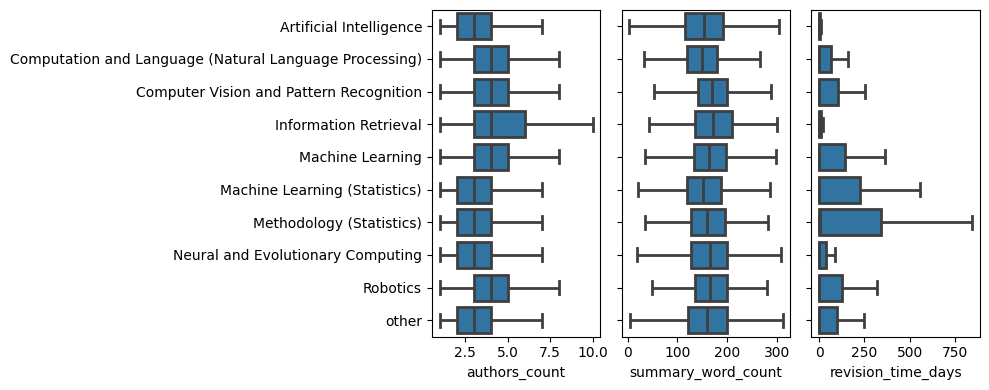

In [76]:
cols = ['authors_count', 'summary_word_count', 'revision_time_days']
fig, ax = plt.subplots(1, len(cols), figsize=(10, 4), sharey=True)

for cnt, c in enumerate(cols):
    sns.boxplot(x=c, y='category2', data=data, ax=ax[cnt], orient="h", showfliers=False, linewidth=2, order=sorted(list(data['category2'].unique())))
    ax[cnt].set_ylabel("")
    ax[cnt].set_xlabel(c, fontsize=10)
    ax[cnt].tick_params(axis='both', labelsize=10)
    plt.tight_layout()

In [77]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split, GridSearchCV, ParameterGrid, cross_validate
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn import set_config
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from sklearn.metrics import classification_report
from sklearn.tree import ExtraTreeClassifier, DecisionTreeClassifier

In [78]:
def random_sample_per_class(df, class_column, fraction, random_state=None):
    tmp_df = df.groupby(class_column, group_keys=False).apply(lambda x: x.sample(frac=fraction, random_state=random_state))
    return tmp_df

fraction_to_sample = 0.1
sampled_df = random_sample_per_class(data, 'category2', fraction_to_sample, random_state=42)

/var/folders/w9/d3h7vx393175sc9kvpd02znh0000gn/T/ipykernel_44443/3817573473.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp_df = df.groupby(class_column, group_keys=False).apply(lambda x: x.sample(frac=fraction, random_state=random_state))


In [79]:
# target variable distribution after sampling
sampled_df['category2'].value_counts()

category2
Machine Learning                                          3999
Computer Vision and Pattern Recognition                   2906
Computation and Language (Natural Language Processing)    2520
Artificial Intelligence                                   1297
Machine Learning (Statistics)                             1045
other                                                     1038
Neural and Evolutionary Computing                          551
Information Retrieval                                       90
Robotics                                                    90
Methodology (Statistics)                                    88
Name: count, dtype: int64

In [82]:
from sklearn.preprocessing import LabelEncoder

num_cols = ['authors_count', 'revision_time_days', 'summary_word_count']
string_col = ['summary']

X = sampled_df[string_col + num_cols]
y = sampled_df['category2']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, shuffle=True, random_state=1234)
print(f"train: {X_train.shape}, test: {X_test.shape}")

train: (10899, 4), test: (2725, 4)


In [83]:
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="mean")), 
           ("scaler", StandardScaler())]
)

string_transformer = Pipeline([
    ('tfidf', TfidfVectorizer())
])


preprocessor = ColumnTransformer(
    transformers=[
        ("text", string_transformer, string_col[0]),
        ("num", numeric_transformer, num_cols),
    ],
    remainder='passthrough'
)

In [84]:
cross_validate_res = []

labels = list(y.unique())
clfs = {'RandomForest':RandomForestClassifier(), 
        # 'GaussianNB':GaussianNB(), 
        # 'KNN':KNeighborsClassifier(),
        "DecisionTree": DecisionTreeClassifier(random_state=0)
}
metrics = ['accuracy','f1_macro']

for cnt, (clf_name, clf) in enumerate(clfs.items()):
    
    pipe = Pipeline(
        steps=[
            ("preprocessor", preprocessor), 
            (clf_name, clf)]
    )

    print(f"processing {clf_name}")
    res = cross_validate(pipe, X_train, y_train, cv=3, return_train_score=True, scoring=metrics)
    pipe.fit(X_train, y_train)

    # preds_train = pipe.predict(X_train)
    # cm_train = confusion_matrix(preds_train, y_train)
    # print(f"CM train :{cm_train}")
    # preds_test = pipe.predict(X_test)
    # cm_test = confusion_matrix(preds_test, y_test)
    # print(f"CM test :{cm_test}")

    preds_test = pipe.predict(X_test)
    print(classification_report(y_test, preds_test, target_names=labels))

    res_df = pd.DataFrame(res).mean()
    res_df = pd.DataFrame(res_df).apply(pd.to_numeric).transpose()
    res_df['Classifier'] = clf_name
    cross_validate_res.append(res_df)

processing RandomForest


/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                                                        precision    recall  f1-score   support

                               Artificial Intelligence       0.64      0.30      0.41       259
Computation and Language (Natural Language Processing)       0.78      0.89      0.83       504
               Computer Vision and Pattern Recognition       0.84      0.86      0.85       581
                                 Information Retrieval       0.00      0.00      0.00        18
                                      Machine Learning       0.51      0.91      0.65       800
                         Machine Learning (Statistics)       0.00      0.00      0.00       209
                              Methodology (Statistics)       0.00      0.00      0.00        18
                     Neural and Evolutionary Computing       1.00      0.06      0.12       110
                                              Robotics       0.00      0.00      0.00        18
                                       

In [85]:
pd.concat(cross_validate_res, ignore_index=True).style.background_gradient(cmap="viridis")

,fit_time,score_time,test_accuracy,train_accuracy,test_f1_macro,train_f1_macro,Classifier
0,7.930189,0.460526,0.645656,1.000000,0.290142,1.000000,RandomForest
1,5.830982,0.435640,0.492522,1.000000,0.289902,1.000000,DecisionTree


In [86]:
rf_pipe = Pipeline(
    steps=[
        ("preprocessor", preprocessor), 
        ("randomforest", RandomForestClassifier())]
)
rf_pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('text',
                                                  Pipeline(steps=[('tfidf',
                                                                   TfidfVectorizer())]),
                                                  'summary'),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['authors_count',
                                                   'revision_time_days',
                                                   'summary_word_count'])])),
                ('randomforest', RandomForestClassifier())])

In [87]:
rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('text',
                                                  Pipeline(steps=[('tfidf',
                                                                   TfidfVectorizer())]),
                                                  'summary'),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['authors_count',
                                                   'revision_time_days',
                                                   'summary_word_count'])])),
                ('randomforest', RandomForestClassifier())])

In [88]:
print(f"RandomForest for train: {rf_pipe.score(X_train, y_train)}, RandomForest for test: {rf_pipe.score(X_test, y_test)}")

RandomForest for train: 1.0, RandomForest for test: 0.6466055045871559


In [89]:
def get_confusion_matrix(pipeline, X:list, true:list, labels:list):
    """plot the confusion matrix for a given datatype
    Args: true, pred
    Return: confusion matrix
    """
    pred = pipeline.predict(X)
    return confusion_matrix(true, pred, labels=labels)

In [90]:
def plot_confusion_matrix(pipe, X, y, type: str):
    """plot a confusion matrix
    Args:
        pipe:
        X:
        y:
        type:
    """

    labels = list(y.unique())
    plt.figure(figsize=(16,10))
    plt.rcParams.update({'font.size': 6})
    
    # compute confusion matrix
    cm = get_confusion_matrix(pipe, X, y, labels=labels)
    
    # plot CM
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot()
    plt.grid(False)
    plt.title(f"CM {type}", fontsize=8)

    plt.tight_layout()
    plt.show()

<Figure size 1600x1000 with 0 Axes>

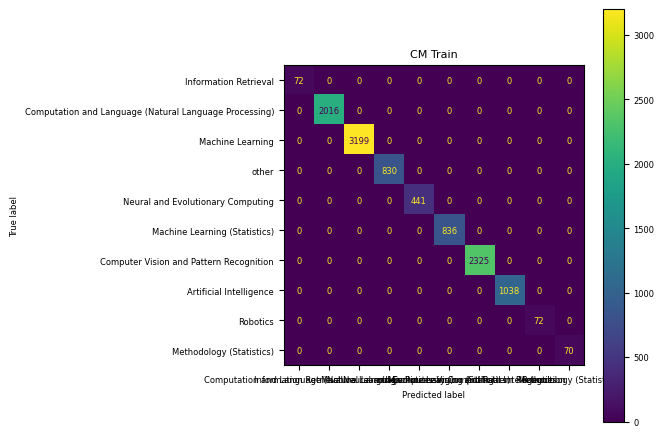

In [91]:
plot_confusion_matrix(rf_pipe, X_train, y_train, "Train")

<Figure size 1600x1000 with 0 Axes>

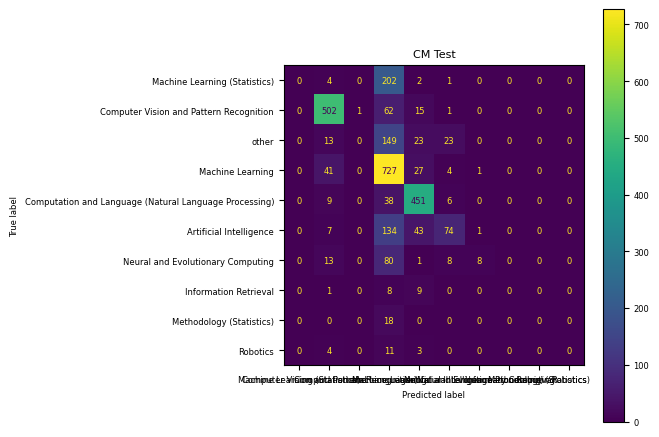

In [92]:
plot_confusion_matrix(rf_pipe, X_test, y_test, "Test")